<a href="https://colab.research.google.com/github/riken-emar/NMF/blob/main/NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nmrglue

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 224 kB 6.8 MB/s 


In [2]:
pip install nimfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 8.3 MB/s 


In [3]:
from scipy.fftpack import fft, ifft
import scipy.signal as sig
import matplotlib.pyplot as plt
import matplotlib.cm
import nmrglue as ng
import numpy as np
import pandas as pd
from numpy.random import randn
import csv
import cmath
import math
import tkinter
from matplotlib.backends.backend_tkagg  import FigureCanvasTkAgg, NavigationToolbar2Tk
from tkinter import messagebox
import nimfa
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("/MIX1.txt", sep='\t')
df

,3.1664,3.16835,3.17029,3.17224,3.17419,3.17613,3.17808,3.18002,3.18197,3.18391,...,3.28121,3.28315,3.2851,3.28704,3.28899,3.29094,3.29288,3.29483,3.29677,3.29872
0,5.090415,5.260472,5.456454,6.129976,6.942296,6.881316,6.297407,6.124968,6.653713,6.920085,...,1.769218,1.121643,0.733640,0.542814,0.455569,0.721731,0.767994,0.504716,0.329636,0.000000
1,4.476456,4.953048,4.841054,4.485274,4.386918,4.247256,4.041224,3.873548,4.377473,5.161606,...,1.371319,1.531545,1.288992,0.802446,0.267312,0.000000,0.067451,0.082412,0.228070,0.585408
2,1.236961,1.462762,1.381018,1.567165,1.805469,2.577937,3.359899,3.781495,4.420261,5.139223,...,0.444809,0.354891,0.152666,0.094735,0.000000,0.290607,0.554262,0.782459,0.999301,0.843966
3,4.293334,4.801160,5.257647,5.696826,5.821155,5.552598,5.318716,5.454080,5.485157,5.432511,...,2.110041,2.192759,1.736453,1.111093,0.591668,0.451077,0.260112,0.000000,0.091975,0.275993
4,1.250193,1.313970,1.100515,1.091628,1.107621,1.129035,1.711848,2.704307,3.940694,5.051626,...,1.335701,1.263939,0.968785,0.612123,0.602039,0.602430,0.452924,0.132107,0.000000,0.214759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2.090863,2.220441,2.473045,2.706976,2.929552,3.304833,3.994667,4.787096,5.371663,5.682280,...,0.153243,0.000000,0.027697,0.405036,0.690823,0.566011,0.580986,0.973617,1.488348,1.433013
120,2.305920,2.671343,3.042704,3.492660,4.059087,4.202489,4.305121,4.413227,4.194433,4.145789,...,0.340220,0.356128,0.565596,0.351648,0.512764,0.742815,0.958919,0.665460,0.000000,0.009768
121,2.394440,2.352693,2.608748,2.926875,3.085767,3.092213,3.165207,3.255510,3.250418,3.311534,...,1.667882,2.003479,2.012421,2.007905,1.925265,1.489100,0.882552,0.595303,0.347269,0.000000
122,3.436019,3.659596,3.856616,4.139911,4.352348,4.463763,4.501491,4.793943,5.168050,5.628674,...,1.921261,1.645193,1.060492,0.539762,0.404457,0.299188,0.095510,0.000000,0.089920,0.405620


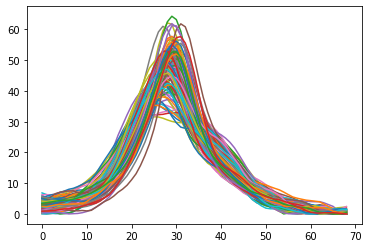

In [8]:
fig = plt.figure()
plt.plot(df.values.T)
plt.show()

rank 2
SF:
[5.05122074e-01 4.49522417e-01 4.29334771e-01 4.38211616e-01
 4.26064500e-01 4.61038847e-01 5.03734960e-01 5.69414294e-01
 6.11970862e-01 6.25110741e-01 6.61832451e-01 6.74973024e-01
 6.75464173e-01 6.66374229e-01 6.76316398e-01 6.88256732e-01
 6.79999843e-01 6.40086597e-01 5.91921069e-01 5.31279174e-01
 4.51652967e-01 3.70468628e-01 2.92654991e-01 2.20255233e-01
 1.56185132e-01 9.80900500e-02 4.89178835e-02 1.54521344e-02
 8.41485397e-04 3.68374384e-03 1.96147739e-02 4.09467788e-02
 5.79238369e-02 6.18853326e-02 5.08592147e-02 3.19774572e-02
 1.43608126e-02 4.20521055e-03 5.04422516e-04 1.47100337e-05
 1.27223720e-04 1.34904475e-04 2.38244961e-06 1.26769947e-04
 5.09241935e-04 9.33612305e-04 1.11032339e-03 9.66592495e-04
 5.32853786e-04 1.44536822e-04 4.11484899e-06 2.79294321e-05
 3.26831398e-04 6.71201754e-04 2.46426732e-03 6.98142507e-03
 1.28897717e-02 2.46346727e-02 3.44890492e-02 4.86388024e-02
 3.98958368e-02 2.50424958e-02 2.76174116e-02 4.93512209e-02
 8.20688470e-

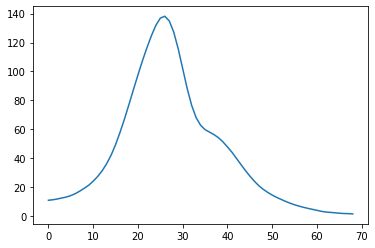

1


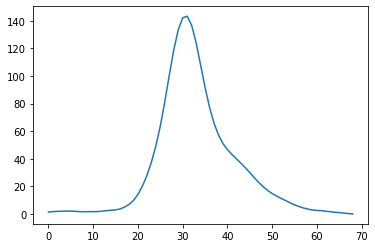

0


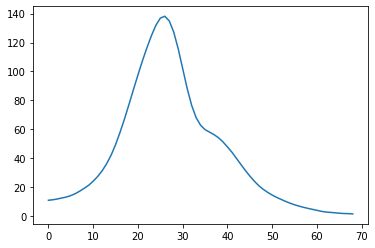

1


<Figure size 432x288 with 0 Axes>

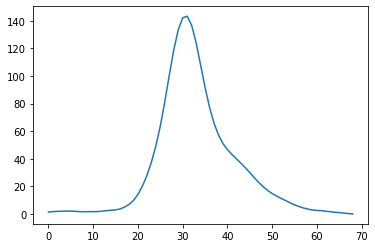

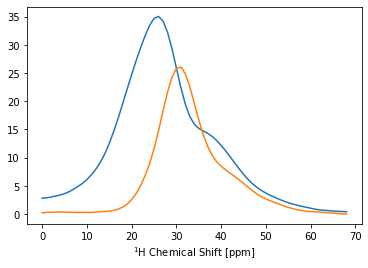

rank 3
SF:
[0.20616505 0.1661452  0.15021463 0.14604103 0.1314459  0.15599391
 0.16046903 0.18367608 0.22131547 0.21214713 0.23177737 0.23584167
 0.23336529 0.26158972 0.22344536 0.22482734 0.24561822 0.26408761
 0.19587417 0.17345503 0.14325732 0.11597771 0.08918813 0.08591873
 0.06621478 0.05163897 0.02570143 0.02885572 0.0327153  0.04427342
 0.06237661 0.08588023 0.11070603 0.13469042 0.13055026 0.28364071
 0.17878657 0.19894141 0.21790507 0.21206723 0.24188255 0.25987265
 0.2768896  0.30265365 0.27947379 0.2416087  0.26572105 0.25837711
 0.23122127 0.2383225  0.23080685 0.22696828 0.22708689 0.21540043
 0.22350749 0.19644197 0.10275295 0.09230055 0.06333315 0.02521577
 0.00868596 0.08668179 0.01067947 0.01966958 0.0626146  0.13496246
 0.07748627 0.17491859 0.35996203]
K-L divergence: 1138.970
Rss: 11261.708
Evar: 0.997
Iterations: 100
Target estimate:
[[3.60155367 2.17268109 3.34272354 ... 2.01725411 2.02329609 1.68284011]
 [3.64497738 2.33194318 3.46479831 ... 2.17280381 2.1932763

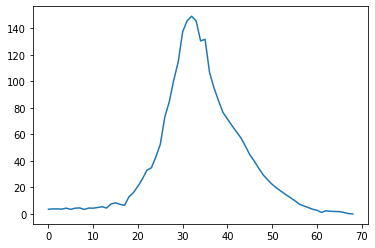

1


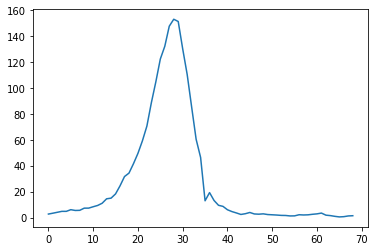

2


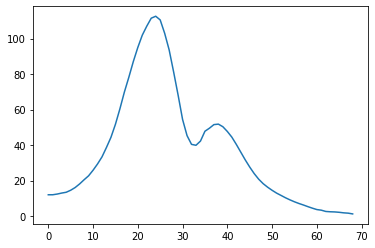

0


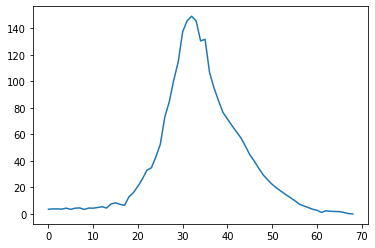

1


<Figure size 432x288 with 0 Axes>

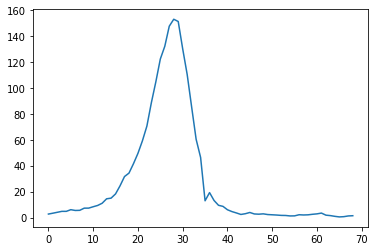

2


<Figure size 432x288 with 0 Axes>

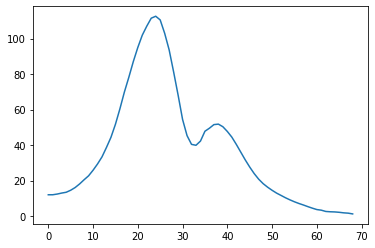

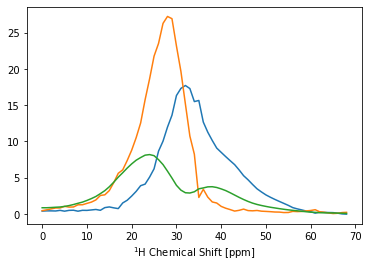

rank 4
SF:
[0.21181724 0.18461409 0.1621426  0.15808918 0.19009336 0.19862978
 0.19540538 0.22527561 0.20881898 0.22367115 0.23248461 0.24185074
 0.24740173 0.23514832 0.24260035 0.23928601 0.2452045  0.26360292
 0.20583442 0.1822038  0.20005476 0.13812542 0.18434206 0.09443112
 0.17141365 0.08438149 0.05359232 0.07297494 0.0587444  0.06887733
 0.29961319 0.07341858 0.07679198 0.1335466  0.04541216 0.03936325
 0.05930031 0.29091027 0.09225773 0.08978504 0.10901496 0.21304616
 0.40113293 0.14659362 0.16327432 0.10680355 0.10680015 0.11108744
 0.11378708 0.23644668 0.20518036 0.10266501 0.1915922  0.09733543
 0.11501818 0.26653287 0.11802859 0.06648656 0.05934194 0.03971794
 0.02316096 0.00746309 0.05269721 0.04688038 0.08573366 0.119882
 0.15462993 0.27114389 0.56804751]
K-L divergence: 1109.535
Rss: 10841.263
Evar: 0.997
Iterations: 100
Target estimate:
[[3.81487387 2.2074409  3.26616417 ... 1.91671412 1.97767932 1.485     ]
 [3.83076505 2.37021657 3.40513011 ... 2.07205217 2.15399213 

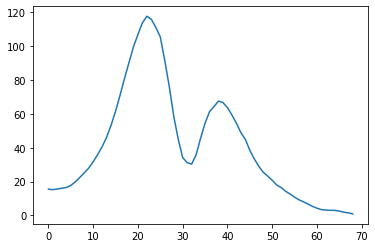

1


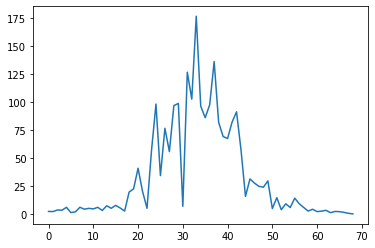

2


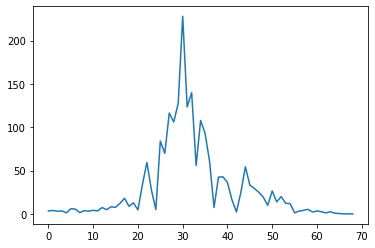

3


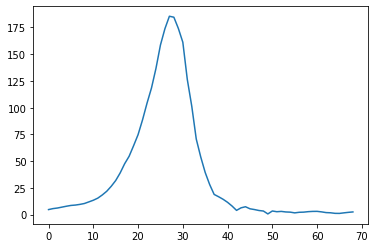

0


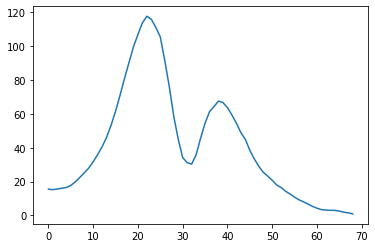

1


<Figure size 432x288 with 0 Axes>

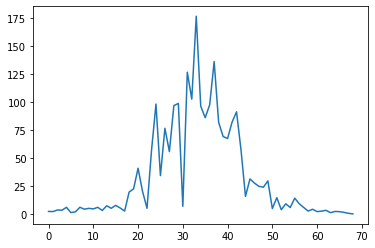

2


<Figure size 432x288 with 0 Axes>

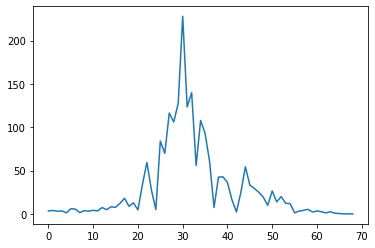

3


<Figure size 432x288 with 0 Axes>

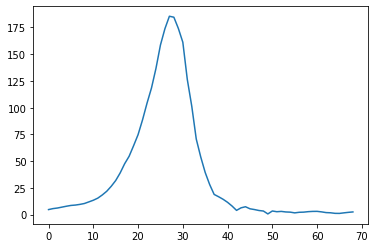

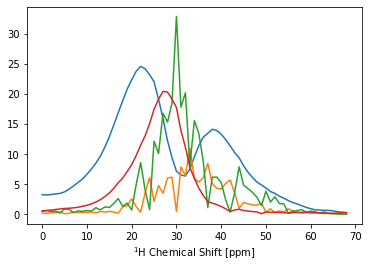

rank 5
SF:
[0.23608188 0.20440754 0.31114187 0.19442945 0.17688539 0.16088872
 0.17544279 0.24064164 0.18993452 0.20198989 0.20444592 0.20784412
 0.20350128 0.29755867 0.30413372 0.20656028 0.272141   0.18264538
 0.16851264 0.16819258 0.13160234 0.12173302 0.08541256 0.06116897
 0.04481567 0.06899392 0.04025603 0.03853894 0.13700086 0.22797444
 0.19729665 0.10580382 0.12486226 0.16423231 0.05617808 0.10550827
 0.13817678 0.10586264 0.12917524 0.14513493 0.15852594 0.17516893
 0.19424857 0.17440109 0.18092469 0.18120898 0.1656439  0.17256642
 0.17456273 0.16844636 0.17331623 0.18755182 0.17654092 0.21275317
 0.19454696 0.18657502 0.16215459 0.20454049 0.1034167  0.07580478
 0.10780816 0.08019421 0.12102983 0.12793464 0.09424758 0.08573279
 0.11643089 0.23071325 0.54915139]
K-L divergence: 1055.965
Rss: 10037.584
Evar: 0.997
Iterations: 100
Target estimate:
[[3.75990808 2.13965909 2.87184645 ... 2.21630288 2.04892809 1.71979306]
 [3.78760908 2.28146623 3.02742376 ... 2.34201722 2.2035829

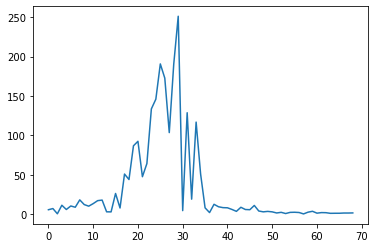

1


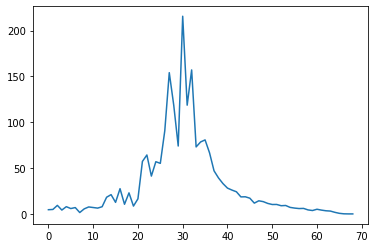

2


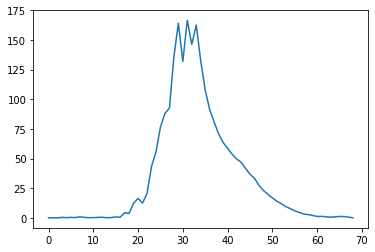

3


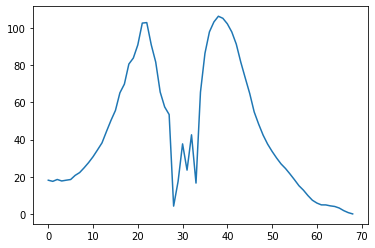

4


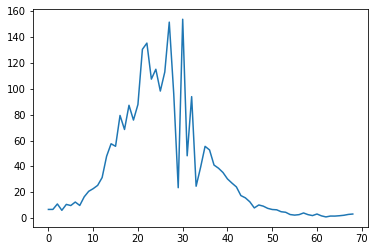

0


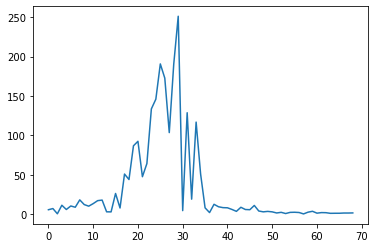

1


<Figure size 432x288 with 0 Axes>

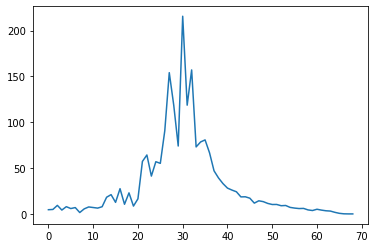

2


<Figure size 432x288 with 0 Axes>

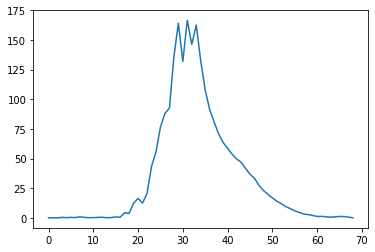

3


<Figure size 432x288 with 0 Axes>

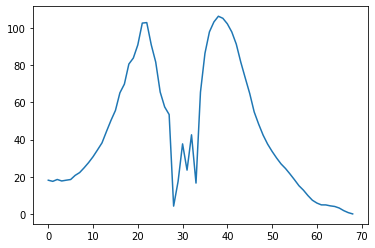

4


<Figure size 432x288 with 0 Axes>

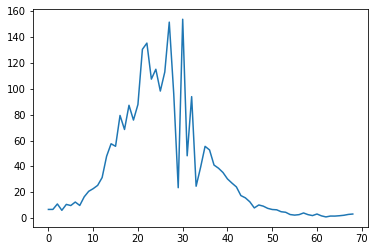

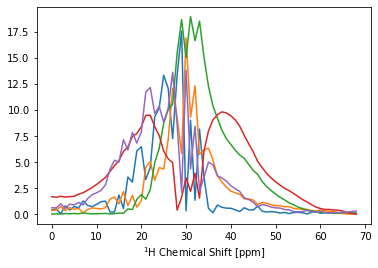

rank 6
SF:
[0.22121531 0.19681391 0.19983617 0.15965431 0.14796025 0.18791628
 0.17797038 0.26231773 0.18702398 0.20022189 0.22578656 0.20387195
 0.21041368 0.24052662 0.22964012 0.20660008 0.21055507 0.18187618
 0.18908087 0.14447055 0.12110659 0.15520057 0.13865328 0.07139528
 0.07826172 0.03523692 0.04061025 0.033      0.07703797 0.06789857
 0.07355266 0.0748876  0.07486901 0.08879531 0.07225377 0.07755667
 0.08582586 0.08845642 0.15543051 0.16653442 0.16294323 0.15870942
 0.17215459 0.18236926 0.1957842  0.21960872 0.1668816  0.16199196
 0.20056797 0.17497367 0.24757301 0.18076478 0.17438788 0.18067176
 0.18460107 0.15355962 0.11894043 0.11614366 0.12667195 0.08182106
 0.06766032 0.06074177 0.0555494  0.08066199 0.21316076 0.16599424
 0.27776975 0.40377292 0.58240051]
K-L divergence: 1048.887
Rss: 9533.081
Evar: 0.997
Iterations: 100
Target estimate:
[[3.78172418 2.1496268  3.11273605 ... 2.19318924 1.66871123 1.33678876]
 [3.80334866 2.2986245  3.23913936 ... 2.34246152 1.81404728

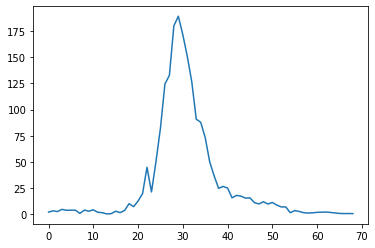

1


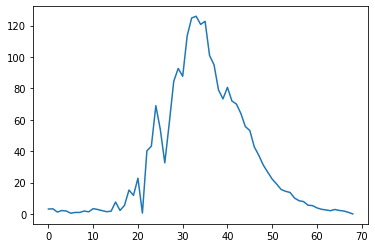

2


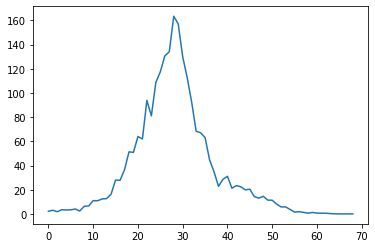

3


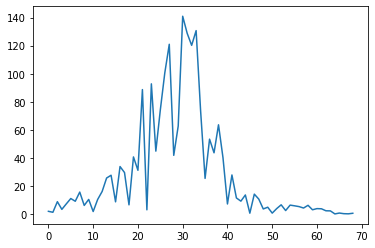

4


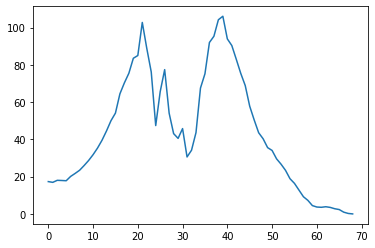

5


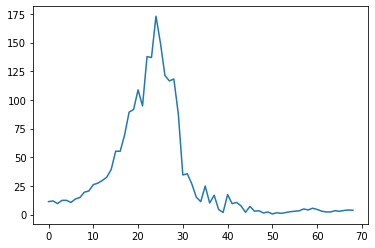

0


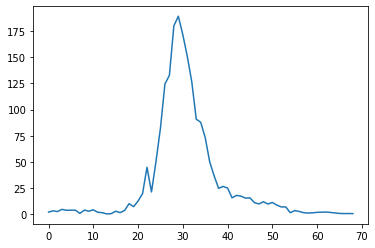

1


<Figure size 432x288 with 0 Axes>

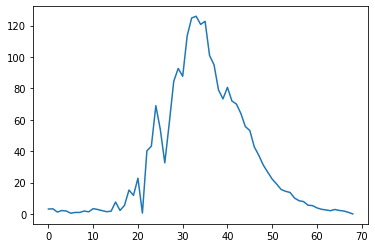

2


<Figure size 432x288 with 0 Axes>

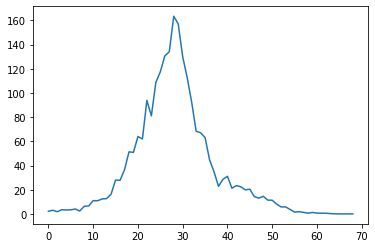

3


<Figure size 432x288 with 0 Axes>

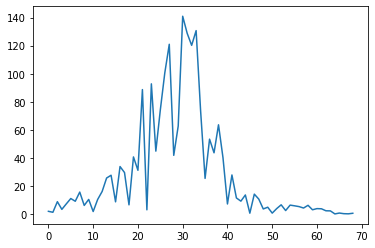

4


<Figure size 432x288 with 0 Axes>

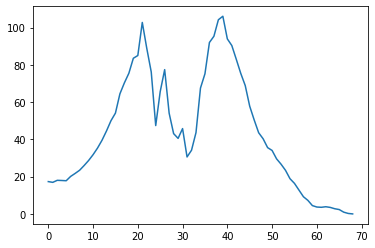

5


<Figure size 432x288 with 0 Axes>

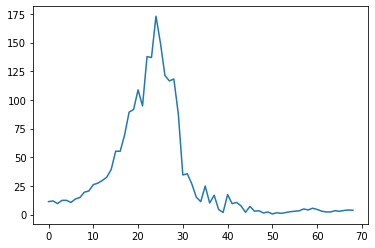

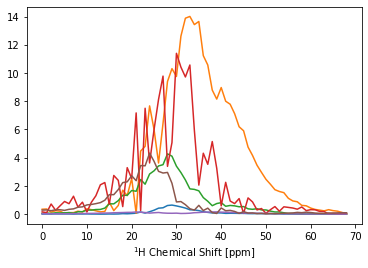

rank 7
SF:
[0.43182939 0.31671415 0.2669026  0.23473085 0.23406407 0.22400572
 0.23487212 0.20844603 0.19611501 0.16581141 0.22090588 0.25418687
 0.2395431  0.22576925 0.22429503 0.22249158 0.1948918  0.16904366
 0.13378713 0.12367555 0.09395736 0.06768321 0.04836576 0.05219731
 0.12262377 0.02575648 0.02542825 0.03699207 0.04689556 0.1072479
 0.08920045 0.12348989 0.09455565 0.10712555 0.11922172 0.12170966
 0.08461153 0.10032544 0.11997906 0.10726167 0.12319645 0.157445
 0.14535595 0.16382091 0.15229705 0.17714483 0.14848529 0.18313505
 0.14966977 0.16865125 0.15603267 0.14378657 0.14083108 0.15131402
 0.18035311 0.14735489 0.10065118 0.09763803 0.09066209 0.12854658
 0.0765696  0.05474257 0.1104721  0.11982273 0.16515447 0.18064415
 0.16038296 0.13492086 0.4970548 ]
K-L divergence: 958.542
Rss: 7795.162
Evar: 0.998
Iterations: 100
Target estimate:
[[3.91650507 3.56251005 3.3748186  ... 2.4670486  2.57030623 1.89871629]
 [3.94495142 3.48423342 3.4935819  ... 2.50850492 2.62092539 1.9

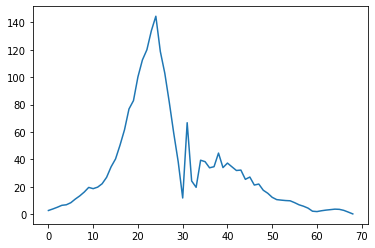

1


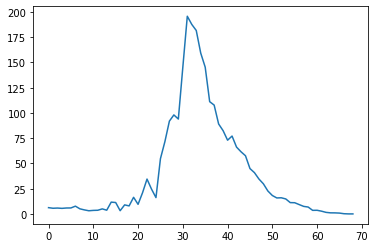

2


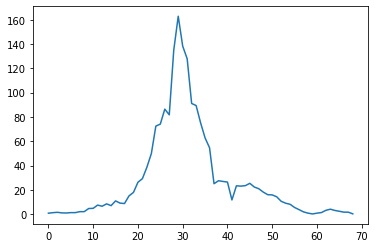

3


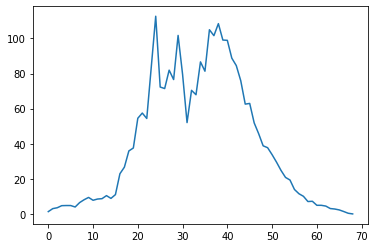

4


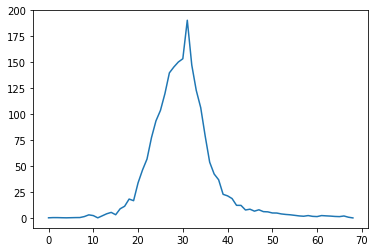

5


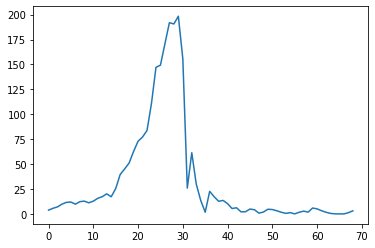

6


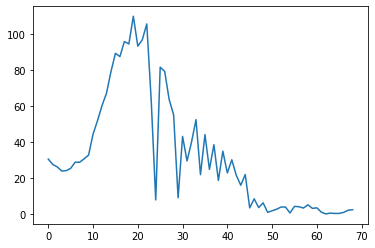

0


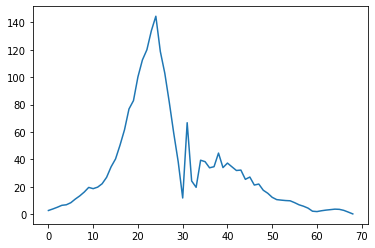

1


<Figure size 432x288 with 0 Axes>

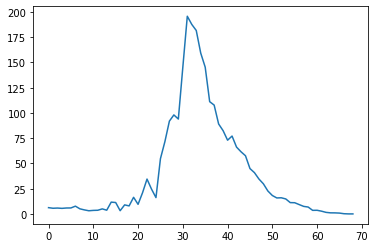

2


<Figure size 432x288 with 0 Axes>

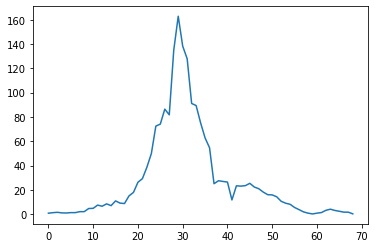

3


<Figure size 432x288 with 0 Axes>

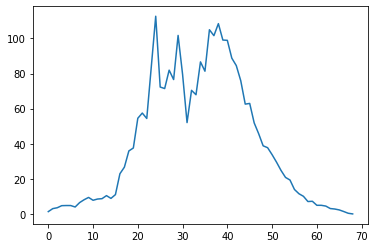

4


<Figure size 432x288 with 0 Axes>

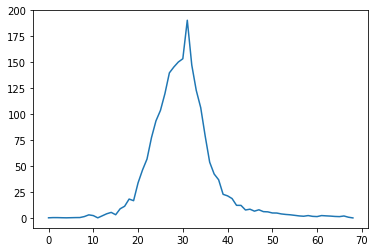

5


<Figure size 432x288 with 0 Axes>

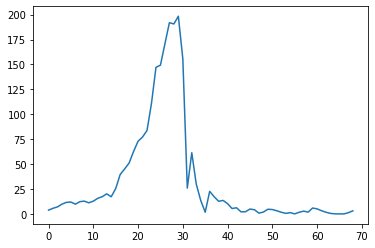

6


<Figure size 432x288 with 0 Axes>

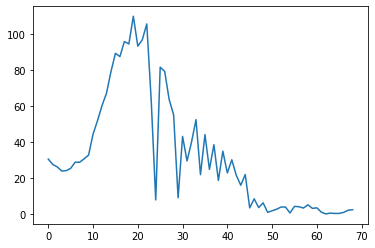

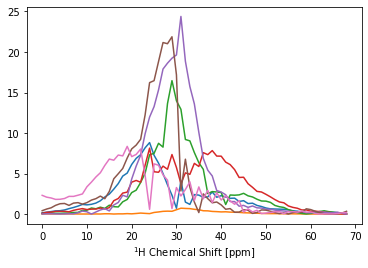

rank 8
SF:
[0.18566165 0.15232055 0.12390428 0.11180037 0.11693226 0.1303272
 0.13561742 0.1530078  0.18187035 0.15286295 0.15343803 0.15892872
 0.15109784 0.15769041 0.14465365 0.15275066 0.13390295 0.12345159
 0.11579724 0.12973869 0.095063   0.08479496 0.06760647 0.05381414
 0.10125867 0.01460504 0.0209373  0.01957848 0.04607629 0.04503594
 0.07217964 0.07633557 0.10523869 0.09892209 0.09997633 0.08663101
 0.07759265 0.0970966  0.11420624 0.1245147  0.12724044 0.14762927
 0.16082047 0.14934062 0.15561529 0.16462351 0.14873933 0.15062012
 0.13595889 0.15493339 0.147922   0.13998065 0.1557817  0.21529476
 0.16490263 0.15671839 0.16047204 0.14780863 0.13867066 0.13247803
 0.14265449 0.1442278  0.12672418 0.12460197 0.13017565 0.16835624
 0.11420266 0.1475089  0.31494688]
K-L divergence: 1042.053
Rss: 9448.568
Evar: 0.997
Iterations: 100
Target estimate:
[[3.73805777 2.09577831 3.2973862  ... 1.959334   1.83930695 1.43582172]
 [3.70383797 2.26282644 3.51096146 ... 2.07152826 1.89197757 

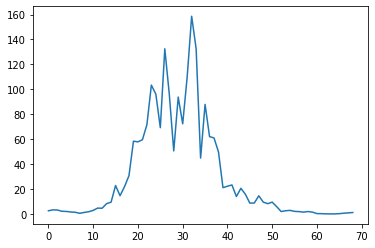

1


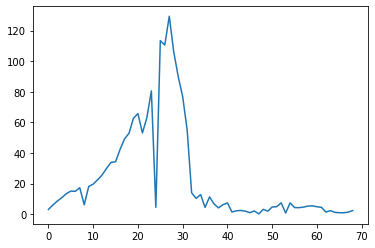

2


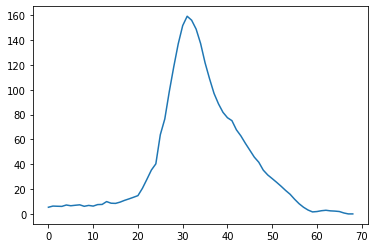

3


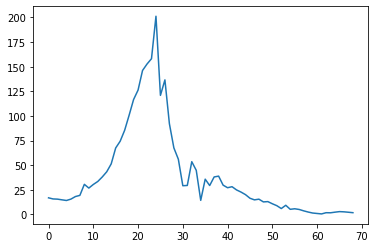

4


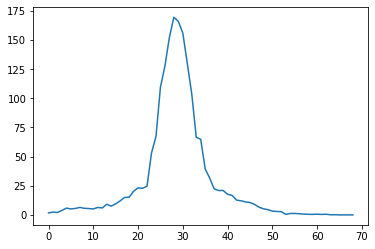

5


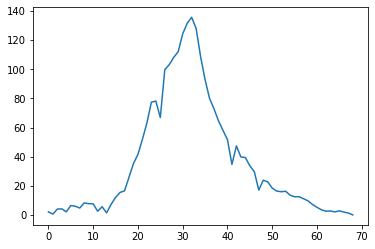

6


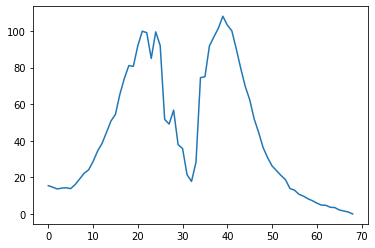

7


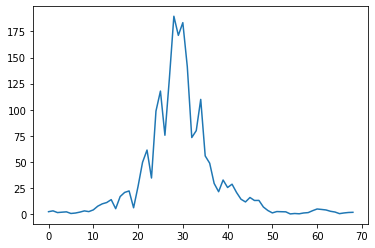

0


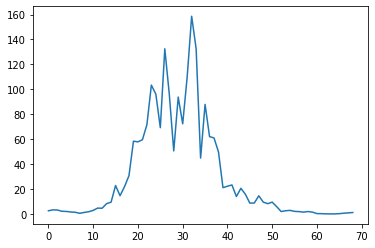

1


<Figure size 432x288 with 0 Axes>

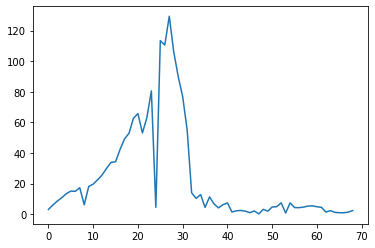

2


<Figure size 432x288 with 0 Axes>

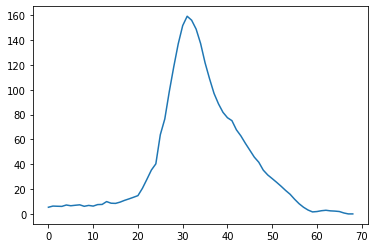

3


<Figure size 432x288 with 0 Axes>

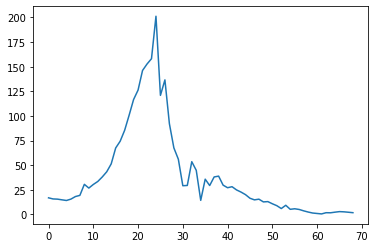

4


<Figure size 432x288 with 0 Axes>

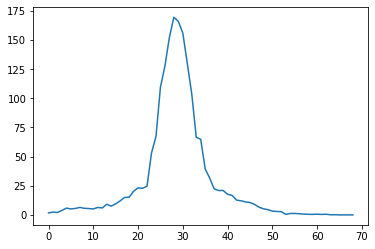

5


<Figure size 432x288 with 0 Axes>

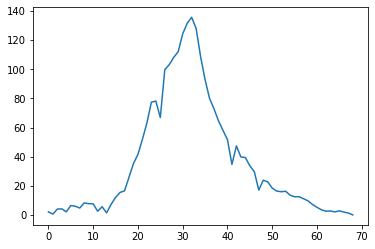

6


<Figure size 432x288 with 0 Axes>

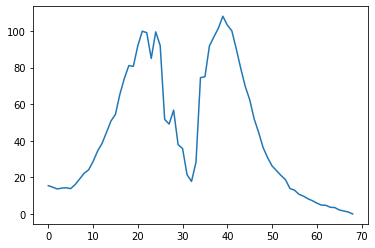

7


<Figure size 432x288 with 0 Axes>

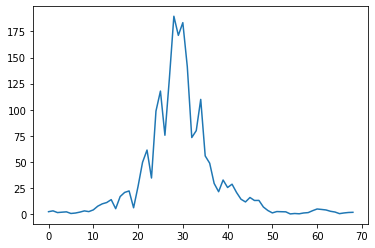

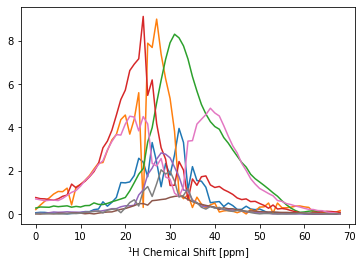

rank 9
SF:
[0.21399225 0.20025902 0.21002189 0.21631716 0.21154106 0.18102585
 0.19966576 0.19960519 0.18620655 0.18046261 0.184402   0.19998131
 0.17880758 0.17843011 0.16230398 0.16572052 0.15076908 0.14384311
 0.1157743  0.1165869  0.08702163 0.07925291 0.06314638 0.04317669
 0.10303693 0.02468719 0.04389306 0.03864461 0.04893773 0.05122245
 0.08166589 0.05956761 0.09393155 0.06343471 0.07590435 0.05723286
 0.05681565 0.07310144 0.07624392 0.09294088 0.09061648 0.12436827
 0.0987833  0.12918439 0.12791127 0.12475026 0.12442654 0.12989713
 0.13636629 0.13906529 0.14957101 0.14612093 0.14903881 0.15841449
 0.16791218 0.16156887 0.11488439 0.14690328 0.1895539  0.16124751
 0.14900551 0.14007235 0.14571348 0.11340131 0.13291891 0.1310097
 0.11983549 0.27748199 0.44115877]
K-L divergence: 956.767
Rss: 8344.061
Evar: 0.998
Iterations: 100
Target estimate:
[[4.09216482 2.46246306 3.20328508 ... 2.06913982 2.28588852 1.8159205 ]
 [4.16167524 2.53706744 3.25481487 ... 2.14957205 2.4842411  1

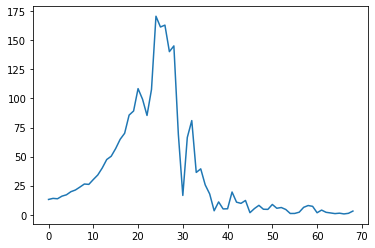

1


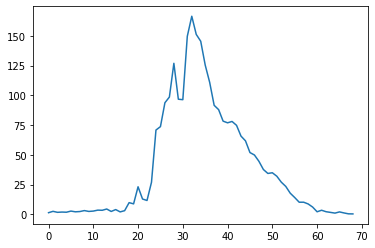

2


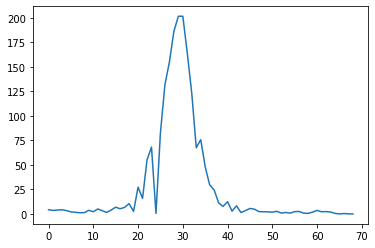

3


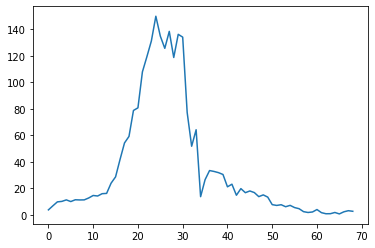

4


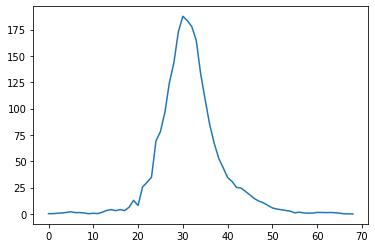

5


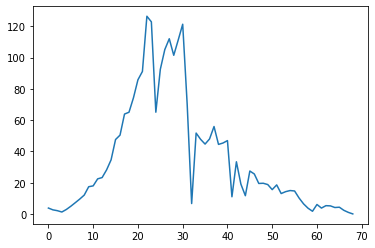

6


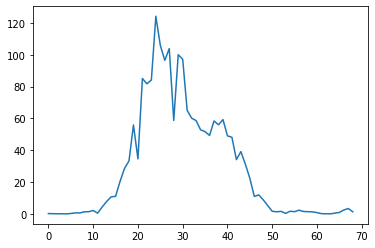

7


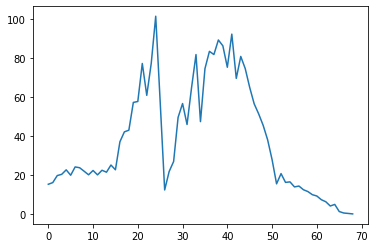

8


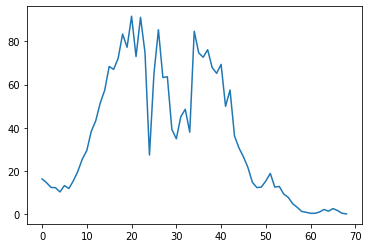

0


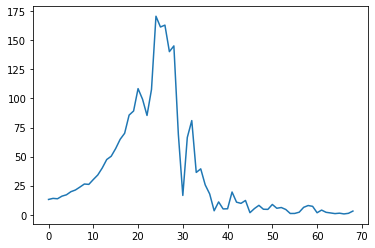

1


<Figure size 432x288 with 0 Axes>

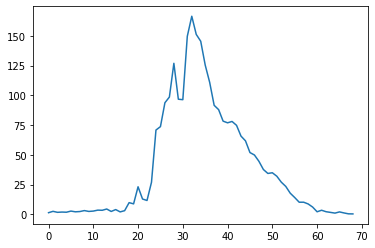

2


<Figure size 432x288 with 0 Axes>

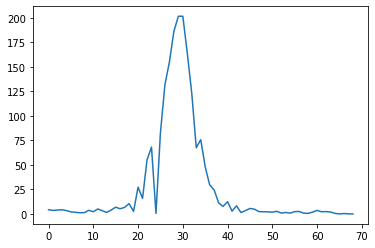

3


<Figure size 432x288 with 0 Axes>

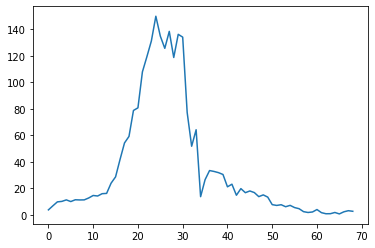

4


<Figure size 432x288 with 0 Axes>

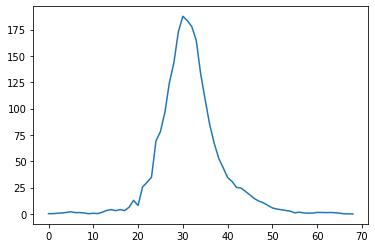

5


<Figure size 432x288 with 0 Axes>

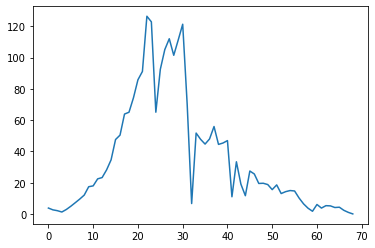

6


<Figure size 432x288 with 0 Axes>

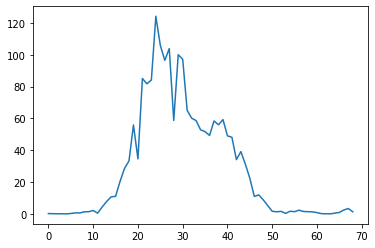

7


<Figure size 432x288 with 0 Axes>

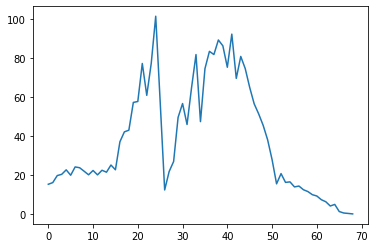

8


<Figure size 432x288 with 0 Axes>

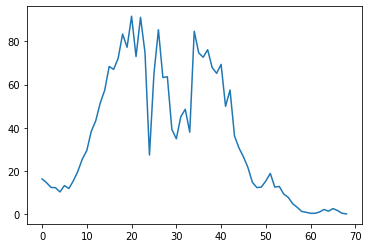

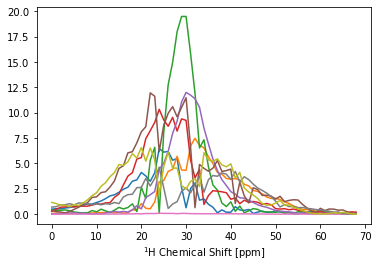

In [11]:
minrank = 2
maxrank = 10
for i in range(minrank,maxrank):
    print("rank", i)
    nmf=nimfa.Nmf(df.values.T, rank=i, max_iter=100)
    nmf_fit=nmf()
    W = nmf_fit.basis()
    H = nmf_fit.coef()
    E = nmf_fit.fit.residuals()
    SF = nmf_fit.fit.score_features()
    print('SF:\n%s' % SF)
    print('K-L divergence: %5.3f' % nmf_fit.distance(metric='kl'))
    print('Rss: %5.3f' % nmf_fit.fit.rss())
    print('Evar: %5.3f' % nmf_fit.fit.evar())
    print('Iterations: %d' % nmf_fit.n_iter)
    print('Target estimate:\n%s' % np.dot(W, H))
    for k in range(i):
     print(k)
     fig = plt.figure()
     plt.plot(W[:,k])
     plt.show()
    for l in range(i):
     print(l)
     fig = plt.figure()
     plt.plot(W[:,l])
     plt.show()
     fig = plt.figure()
    for n in range(i):
     A=H
     B=H
     A=np.array(H)
     B=np.array(H)
     plt.plot(np.dot(W[:,n],A[0,n]))
     plt.xlabel('$^{1}$H Chemical Shift [ppm]')
    plt.show()